Let's look at a sample of $W$ boson candidates, particularly those that decay to a muon: $\mu$ and a neutrino: $\nu$. A selection has already been performed on the SingleMu sample collected by the CMS Experiment in 2011. 

The selection code is here: https://github.com/tpmccauley/Wmunu-filter

An event is kept if there is one (and only one) global muon in the event that satisfies:
* $p_{t}$ > 30.0 GeV
* |$\eta$| < 2.1
* relative isolation < 0.15

We output the following information to a csv (comma-separated-variable) file:

Run,Event,pt,eta,phi,Q,MET,phiMET

Let's read in the csv file and calculate the transverse mass $M_{T}$, where 

$M_{T} = \sqrt{2p_{t}MET(1 - \cos{\Delta\phi})}$

and make a histogram of the results.

In [3]:
import csv
import math
import numpy

transverse_mass = []

with open('Wmunu_Run2011A.csv') as csvfile:
    
    reader = csv.DictReader(csvfile)
   
    for row in reader:
    
        pt = float(row['pt'])
        phi = float(row['phi'])
        MET = float(row['MET'])
        phiMET = float(row['phiMET'])
        
        MT = math.sqrt(2*pt*MET*(1-math.cos(phi-phiMET)))
        
        transverse_mass.append(MT)
        
MT_hist = numpy.histogram(transverse_mass, bins=24, range=(0,120))

The histogram returns the bin edges and the numbers within the bins which we can output:

In [5]:
hist, bins = MT_hist
print(hist)
print(bins)

[3576 3543 3624 3777 3967 4242 4495 4805 5242 5863 6802 7528 8601 9147 9503
 8889 7060 4762 2689 1369  687  347  209  119]
[   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.
  120.]


Of course it's better view this graphically so let's plot it:

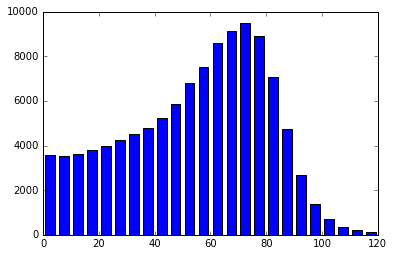

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = MT_hist
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


In [16]:
len(transverse_mass)

111239